# Vježba 4 - Klasifikacija tekstualnih dokumenata

U sklopu vježbe ćemo izvršiti klasifikaciju dokumenata na spam i ham. Za obučavanje klasifikatora se koristi trening skup, dok se za tesitiranje rada klasifikator koristi testni skup. Za izbor hiperparametara klasifikatora se koristi validacioni skup. U narednoj ćeliji je potrebo napisati kod koji će izvršiti podjelu skupa dokumenata na treining i test skup. Za ovo je moguće iskoristiti funkciju <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> iz biblioteke sklearn. Skup je potrebno podjeliti tako da 50% dokumenata pripada trening skupu, a 50% test skupu. Nakon toga od dobijenog traing skupa potrebno 20% uzoraka ostaviti za validacioni skup. Obratiti pažnju na parametar stratify da se ne desi da se u jednom od skupova nalazi većina predstavnika jedne od klasa.

In [3]:
import string
import os

#Putanja do korpusa
path = "./enron"

#Lista koja sadrži putanje do svih fajlova
file_paths = []

#Lista koja sadrži labele za sve fajlove
targets = []

#Prolazak kroz sve fajlove
for dirpath, dirs, files in os.walk(path):
    for f in files:
        #print(fname)
        fname = os.path.join(dirpath, f)    #Putanja do fajla
        file_paths.append(fname)            #Dodavanje putanje u listu putanja
        if fname.split('.')[-2] == "spam":
            targets.append(1)
        else:
            targets.append(0)

In [4]:
from sklearn.model_selection import train_test_split

#KOD
#Izlazi trebaju biti paths_train, paths_val, paths_test, y_train, y_val, y_test
paths_train, paths_test, y_train, y_test =  train_test_split(file_paths, targets, test_size = 0.5, shuffle = True)
paths_train, paths_val, y_train, y_val = train_test_split(paths_train, y_train, test_size=0.2, shuffle = True)



U naredne dvije ćelije je dat kod koji vrši računanje vektorske reprezentacije za svaki od dokumenata iz sva tri skupa.

In [5]:
from nltk.stem.porter import PorterStemmer
import re
import nltk

stemmer = PorterStemmer()
minlen = 1

def normalize(text):
    # Funkcija koja vrši normalizaciju teksta
    text = text.lower()                                         #Pretvaranja u mala slova
    text = re.sub('<[^<>]+>', ' ', text)                        #Uklanjanje HTML tagova
    text = re.sub('(http|https)://[^\s]*', 'httpaddr', text)    #Uklanjanje URL-ova
    text = re.sub('[^\s]+@[^\s]+', 'emailaddr', text)           #Uklanjanje mail adresa
    text = re.sub('[0-9]+', 'number', text)                     #Zamjena svih brojeva u tekstu riječju number
    text = re.sub('[$]+', 'dollar', text)                       #Zamjana znaka $ rječju dollar
    return text

def tokenize(text):
    #Funkcija koja vrši tokenizaciju teksta na sastavne riječi
    text = normalize(text)
    tokens = nltk.word_tokenize(text)            #Tokenizacija teksta
    stems = []
    for token in tokens:
        stem = stemmer.stem(token)               #Stemizacija tokena
        if len(stem) > minlen:                   #Zadržavanje tokena čija je dužina veća od minlen
            stems.append(stem)
    return stems

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

#Dictionary koji sadrži tekst svakog dokumenta iz trening skupa
train_dict = {}

#Dictionary koji sadrži tekst svakog dokumenta iz validacionog skupa
val_dict = {}

#Dictionary koji sadrži tekst svakog dokumenta iz test skupa
test_dict = {}

#Prolazak kroz sve fajlove iz svih skupova
for fname in paths_train:
    with open(fname, 'r', encoding="utf8", errors='ignore') as fh:
        train_dict[fname] = fh.read()
        
for fname in paths_val:
    with open(fname, 'r', encoding="utf8", errors='ignore') as fh:
        val_dict[fname] = fh.read()
        
for fname in paths_test:
    with open(fname, 'r', encoding="utf8", errors='ignore') as fh:
        test_dict[fname] = fh.read()

#Definisanje objekta koji služi za određivanje TFIDF reprezentacije, za tokenizaciju se koristifunkcije data
#kao parametar tokenize, dok se kao stop riječi koriste one iz enegleskog jezika (moguće je zadati i listu koja sadrži stop riječi)
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')

#Učenje rječnika i transformacija dokumenata koji su iskorišteni za učenje rječnika
#U representations_tfidf se sada nalazi rezrezentacija svih dokumenata iz korpusa
X_train = tfidf.fit_transform(train_dict.values())
y_train = np.array(y_train)

X_val = tfidf.transform(val_dict.values())
y_val = np.array(y_val)

X_test = tfidf.transform(test_dict.values())
y_test = np.array(y_test)

X_train.shape

C:\Users\Jova\Anaconda3\envs\mms\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.

(2068, 20100)

In [22]:
print(X_train[-1])

  (0, 17687)	0.05669430810971992
  (0, 8696)	0.2689011248875405
  (0, 278)	0.2948576553603697
  (0, 7790)	0.24708255734239007
  (0, 11673)	0.3649750568025376
  (0, 7735)	0.3649750568025376
  (0, 17014)	0.3982992150852831
  (0, 10674)	0.41095018433618796
  (0, 12721)	0.427260120389412


U naredne dvije ćelije je potrebno napisati kod koji implementira klasifikator na principu k najbližih susjeda, te implementirati funkciju koja vrši računanje tačnosti. Korisna fukcija pri implementrianju knn algoritma je <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html">pairwise_distances</a> iz sklearn biblioteke.

In [7]:
from sklearn.metrics.pairwise import pairwise_distances

def knn(query, train_data, train_targets, k = 5):
    """Fukcija koja kao rezultat vraća predikcije za sve dokumente iz query vektora na osnovu knn algoritma
    
    Parameters
    ----------
    query - niz oblika (n_dokumenata, n_obilježija) koji predstavlja upit
    train_data - niz oblika (n_dokumenata, n_obilježija) koji predstavlja trening skup
    train_targets - niz oblika (n_dokumenata) koji sadrži labele za elemente trening skupa
    k - parametar koji određuje koliko se susjeda koristi
    
    Returns
    -------
    predictions - niz oblika (n_dokumenata, ) koji sadrži prediktovanu labelu za sve dokumente iz query"""
    
    #KOD
    predictions = []
#     for rep in query:
#         distances = []
#         for rep_t in train_data:
#             dis = pairwise_distances(rep, rep_t)
#             distances.append(dis)
#         sorted_dis = np.argsort(distances)
#         k_best = sorted_dis[0:k:1]
#         one_count = 0
#         for n in train_targets[k_best]:
#             if n == 1: one_count += 1
#         if one_count > k/2: 
#             predictions.append(1)
#         else:
#             predictions.append(0)
            
    distance_matrix = pairwise_distances(query, train_data)
    sorted_distances = np.argsort(distance_matrix, axis=1)
    k_best = sorted_distances[:,:k]
    k_best_real_classes = train_targets[k_best]
    for row in k_best_real_classes:
        to_append = np.bincount(row).argmax()
        predictions.append(to_append)
    
            
    return predictions
    

In [8]:
def calculate_accuracy(predictions, targets):
    """Funkcija koja vrši računanje tačnosti
    
    Parameters
    ----------
    predictions - niz oblika (n_dokumenata, ) koji sadrži prediktovane labele
    targets - niz oblika (n_dokumenata, ) koji sadrži stvarne labele
    
    Returns
    -------
    accuracy - tačnost prediktovanih vrijednosti"""
    
    #KOD
    return ((predictions - targets)==0).sum()/len(predictions)

Izvršiti obučavanje klasifikatora na bazi knn algoritma i izvršiti iybor hiperparametara. Provjeriti uticaj parametra k na tačnost klasifikacije. Paramatear k uzeti iz opsega [1, 7]. Nacrtati grafik zavisnosti tačnosti klasifikacije na validacionom skupu od parametra k.

In [23]:
#KOD
import numpy as np

k = np.arange(1, 8)
accs = []

for n in k:
    predictions = knn(X_val, X_train, y_train, n)
    print(n)
    acc = calculate_accuracy(predictions, y_val)
    accs.append(acc)
    

1
2
3
4
5
6
7


[0.9305019305019305, 0.9054054054054054, 0.9266409266409267, 0.9111969111969112, 0.9247104247104247, 0.9131274131274131, 0.915057915057915]


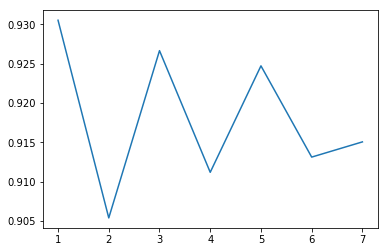

In [24]:
import matplotlib.pyplot as plt

print(accs)

plt.plot(k, accs)

Iskoristiti funkciju <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">confusion_matrix</a> iz biblioteke sklearn za određivanje matrice konfuzija. Za parametar k koji daje najbolje rezultate na validacionom skupu prikazati matricu konfuzija i ta;nost na testnom skupu.

In [15]:
from sklearn.metrics import confusion_matrix

#KOD

conf_mat = confusion_matrix(y_test, knn(X_test, X_train, y_train, 1))
print(conf_mat)

[[1751   92]
 [  86  657]]


U narednom djelu vježbe je potrebno iskoristiti mašine sa vektorima nosačima kao algoritam za klasifikaciju. Implementacija mašina sa vektorima nosačima je data u biblioteci sklearn u klasi <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a>. Za treniranje klasifikatora je moguće iskoristiti metodu fit, dok se za predikciju koristi metoda predict. Provjeriti uticaje parametara kao što su tip kernela, C i gamma na tačnost klasifikacije na validacionom skupu. Kao kernel isprobati linearni i RBF, za parametar C iskoristiti vrijednosti {1, 10, 100, 1000}, a za parametar gamma {0.1, 0.01}.

In [21]:
from sklearn.svm import SVC

#KOD
gamma = [0.1, 0.01]
C = [1, 10, 100, 1000]
max_acc = 0
max_gamma = 0
max_c = 0
clf = SVC(gamma=0.1)
clf.fit(X_train, y_train)
for g in gamma:
    for c in C:
        clf = SVC(gamma = g, C = c)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        acc = calculate_accuracy(pred, y_val)
        print(acc, " ", g, " ", c)
        if acc>max_acc:
            max_gamma = g
            max_c = c

0.9536679536679536   0.1   1
0.9787644787644788   0.1   10
0.9806949806949807   0.1   100
0.9806949806949807   0.1   1000
0.7065637065637066   0.01   1
0.9536679536679536   0.01   10
0.9806949806949807   0.01   100
0.9806949806949807   0.01   1000


In [22]:
def svc(gammap, c, X_test):
    clf = SVC(gamma = gammap, C = c)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return pred

In [6]:
#KOD

Prikazati matricu konfuzija i ta;nost na testnom skupu za parametre mašine sa vektorima nosačima koja daje najveću tačnost na validacionom skupu.

In [24]:
#KOD
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, svc(max_gamma, max_c, X_test))

In [27]:
print(conf_mat)

print(( 1- 1803/1825)*100)

[[1803   40]
 [  13  730]]
1.2054794520547918
